<a href="https://colab.research.google.com/github/arifpras/BelutListrik/blob/main/20250617_fpl_def_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Start the R runtime

Click Runtime > Change runtime type and set:

* Runtime type: R

# Installing and loading packages

In [ ]:
# Start timer
# start_time <- Sys.time()

# Define required packages
# packages <- c("broom", "car", "caret", "colorspace", "corrr", "dplyr", "estimatr",
#               "forestmodel", "ggplot2", "glmnet", "janitor", "lmtest", "magrittr",
#               "moderndive", "parameters", "pastecs", "patchwork", "pgmm", "pglm",
#               "plm", "purrr", "readr", "see", "sjlabelled", "sjmisc",
#               "sjPlot", "skimr", "stargazer", "texreg", "tidyr", "tseries", "viridis")

# packages <- c("dplyr", "ggplot2", "broom", "car", "caret", "glmnet",
#               "lmtest", "tseries", "readr", "corrr", "skimr", "parameters",
#               "sjPlot", "stargazer", "see", "viridis")

# Install missing packages
# to_install <- packages[!packages %in% installed.packages()[,"Package"]]
# if (length(to_install)) install.packages(to_install)

# Load all packages
# invisible(lapply(packages, library, character.only = TRUE))

# End timer
# end_time <- Sys.time()
# elapsed <- end_time - start_time

# Show elapsed time
# cat("✅ All packages loaded. Time taken:", round(elapsed, 2), "seconds.\n")

🔧 Core Data Manipulation & Utilities
* dplyr – Grammar of data manipulation (e.g., filter(), mutate(), group_by())

* tidyr – Tools for reshaping and tidying messy data (pivot_longer(), pivot_wider())

* magrittr – Adds pipe operator %>% to chain operations

* readr – Fast CSV and flat file reading (read_csv())

* skimr – Pretty and compact data summaries

* pastecs – Descriptive stats for time series (mean, sd, skewness, etc.)

* janitor - Clean and format messy data


---


📊 Visualization & Plot Enhancers
* ggplot2 – The gold standard for data visualization (Grammar of Graphics)

* patchwork – Combine multiple ggplots into one layout

* colorspace – Color palettes and scale customization

* see – Companion visuals for bayestestR, parameters, etc.

* sjPlot – Plot regression models, diagnostics, and more

* forestmodel – Forest plots for regression outputs


---


📈 Modeling and Regression
* plm – Panel data econometrics (FE, RE models)

* pgmm – GMM estimation for panel data

* pglm – Generalized linear models for panel data

* lmtest – Hypothesis testing for linear regression models

* car – Companion tools for linear regression diagnostics

* estimatr – Fast robust regression estimators (clustered SEs, etc.)

* tseries – Time series analysis (e.g., unit root tests)

* broom – Tidies model output into data frames

* parameters – Extract, summarize, and format model parameters

* corrr – Tidy correlation matrix handling and visualization


---


📋 Model Reporting and Presentation
* stargazer – Regression tables in LaTeX, HTML, or ASCII

* texreg – Publication-ready regression tables (multiple models)

* sjlabelled – Manage variable labels (label, recode, convert)

* sjmisc – Tools for working with labelled or survey-style data


---


🧬 Other Utilities
* reticulate – Run Python code within R, bridging R ↔ Python

# Mount Google Drive

Change the runtime to Python 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Return to R

In [ ]:
setwd("/content/drive/MyDrive/00fpl")
getwd()

[1] "/content/drive/MyDrive/00fpl"

# Prepare the dataset

In [ ]:
library(readr)
library(dplyr)

players2324 <- read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2023-24/gws/merged_gw.csv",
col_types = cols(
  saves = col_double(),
  kickoff_time = col_datetime()
  ))

glimpse(players2324)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 29,725
Columns: 41
$ name                       <chr> "Femi Seriki", "Jack Hinshelwood", "Jadon S…
$ position                   <chr> "DEF", "MID", "MID", "DEF", "MID", "GK", "M…
$ team                       <chr> "Sheffield Utd", "Brighton", "Man Utd", "Sh…
$ xP                         <dbl> 0.5, 1.5, 3.0, 0.1, 2.1, 2.4, 0.5, 4.1, 0.0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 0, 1, 15, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 11.3, 0.0, 11.5, 0.0, 0.0, 0.0, 0…
$ element                    <dbl> 653, 621, 397, 487, 105, 607, 655, 354, 417…
$ expected_assists           <dbl> 0.00, 0.00, 0.05, 0.00, 0.01, 0.00, 0.01, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.05, 0.00, 0.03, 0.00, 0.01, 0…
$ expected_goal

In [ ]:
library(readr)
library(dplyr)

players2425a <- read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2024-25/gws/merged_gw.csv",
col_types = cols(
  saves = col_double(),
  kickoff_time = col_datetime()
  ))

players2425b <- players2425a %>%
  filter(GW <= 21) %>%
  # mutate(
  #   was_home = as.numeric(was_home),
  #   GW = as.numeric(GW)
  # ) %>%
  select(-modified, -was_home, -GW)

# players2425gw22a <- read_csv("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2024-25/gws/gw22.csv",
# col_types = cols(
#   saves = col_double(),
#   kickoff_time = col_datetime()
#   ))

# players2425gw22b <- players2425gw22a %>%
#   select(-mng_clean_sheets, -mng_draw, -mng_goals_scored, -mng_loss, -mng_underdog_draw, -mng_underdog_win, -mng_win) %>%
#   mutate("GW" = 22)

glimpse(players2425b)
# glimpse(players2425gw22b)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


Rows: 21,509
Columns: 39
$ name                       <chr> "Alex Scott", "Carlos Miguel dos Santos Per…
$ position                   <chr> "MID", "GK", "DEF", "MID", "MID", "DEF", "D…
$ team                       <chr> "Bournemouth", "Nott'm Forest", "Arsenal", …
$ xP                         <dbl> 1.6, 2.2, 0.0, 0.0, 1.0, 1.9, 1.9, 1.5, 1.3…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 11, 0, 0, 0, -2, 17, 0, 0, 14, 0, 0, 0, 11,…
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…
$ creativity                 <dbl> 12.8, 0.0, 0.0, 0.0, 14.0, 1.9, 0.0, 0.0, 1…
$ element                    <dbl> 77, 427, 22, 197, 584, 52, 215, 609, 550, 6…
$ expected_assists           <dbl> 0.01, 0.00, 0.00, 0.00, 0.02, 0.01, 0.00, 0…
$ expected_goal_involvements <dbl> 0.01, 0.00, 0.00, 0.00, 0.32, 0.01, 0.00, 0…
$ expected_goal

In [ ]:
library(dplyr)
library(readr)
library(purrr)

# Gameweeks to load
gws <- 22:38

# Function to read and clean a single GW file
read_gw_data <- function(gw) {
  url <- sprintf("https://raw.githubusercontent.com/vaastav/Fantasy-Premier-League/refs/heads/master/data/2024-25/gws/gw%d.csv", gw)

  read_csv(url, col_types = cols(
    saves = col_double(),
    kickoff_time = col_datetime()
  )) %>%
    select(-starts_with("mng_")) %>%                # remove all columns starting with mng_
    mutate(GW = as.character(gw))                   # add GW as character
}

# Load and combine all GWs
players2425_gw22_38 <- map_dfr(gws, read_gw_data)

players2425_gw22_38b <- players2425_gw22_38 %>%
  select(-modified, -was_home, -GW)

glimpse(players2425_gw22_38b)

Rows: 13,427
Columns: 39
$ name                       <chr> "Welington Damascena Santos", "Alex Scott",…
$ position                   <chr> "DEF", "MID", "GK", "DEF", "MID", "MID", "D…
$ team                       <chr> "Southampton", "Bournemouth", "Nott'm Fores…
$ xP                         <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2…
$ bps                        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 25, 0, 0, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0…
$ element                    <dbl> 718, 77, 427, 22, 197, 584, 52, 215, 716, 6…
$ expected_assists           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ expected_goal

In [ ]:
players2425 <- bind_rows(players2425b, players2425_gw22_38b)

glimpse(players2425)

Rows: 34,936
Columns: 39
$ name                       <chr> "Alex Scott", "Carlos Miguel dos Santos Per…
$ position                   <chr> "MID", "GK", "DEF", "MID", "MID", "DEF", "D…
$ team                       <chr> "Bournemouth", "Nott'm Forest", "Arsenal", …
$ xP                         <dbl> 1.6, 2.2, 0.0, 0.0, 1.0, 1.9, 1.9, 1.5, 1.3…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 11, 0, 0, 0, -2, 17, 0, 0, 14, 0, 0, 0, 11,…
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…
$ creativity                 <dbl> 12.8, 0.0, 0.0, 0.0, 14.0, 1.9, 0.0, 0.0, 1…
$ element                    <dbl> 77, 427, 22, 197, 584, 52, 215, 609, 550, 6…
$ expected_assists           <dbl> 0.01, 0.00, 0.00, 0.00, 0.02, 0.01, 0.00, 0…
$ expected_goal_involvements <dbl> 0.01, 0.00, 0.00, 0.00, 0.32, 0.01, 0.00, 0…
$ expected_goal

In [ ]:
glimpse(players2324)

Rows: 29,725
Columns: 41
$ name                       <chr> "Femi Seriki", "Jack Hinshelwood", "Jadon S…
$ position                   <chr> "DEF", "MID", "MID", "DEF", "MID", "GK", "M…
$ team                       <chr> "Sheffield Utd", "Brighton", "Man Utd", "Sh…
$ xP                         <dbl> 0.5, 1.5, 3.0, 0.1, 2.1, 2.4, 0.5, 4.1, 0.0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 0, 1, 15, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 11.3, 0.0, 11.5, 0.0, 0.0, 0.0, 0…
$ element                    <dbl> 653, 621, 397, 487, 105, 607, 655, 354, 417…
$ expected_assists           <dbl> 0.00, 0.00, 0.05, 0.00, 0.01, 0.00, 0.01, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.05, 0.00, 0.03, 0.00, 0.01, 0…
$ expected_goal

In [ ]:
install.packages("janitor")
library(janitor)
library(dplyr)

# 1. Harmonize types
players2324 <- players2324 %>%
  # mutate(
  #   was_home = as.character(was_home),
  #   GW = as.character(GW),
  # ) %>%
  select(-was_home, -GW)

# players2425 <- players2425 %>%
#   mutate(
#     was_home = as.character(was_home),
#     GW = as.character(GW)
#   ) %>%
#   select(-modified, -was_home, -GW)

# 2. Combine the datasets and add a season tag
# db00 <- bind_rows(
#   mutate(players2324, season = "2023/24"),
#   mutate(players2425, season = "2024/25")
# ) %>%
#   janitor::clean_names()

db00 <- players2324 %>%
  janitor::clean_names()

# 3. Check result
glimpse(db00)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Rows: 29,725
Columns: 39
$ name                       <chr> "Femi Seriki", "Jack Hinshelwood", "Jadon S…
$ position                   <chr> "DEF", "MID", "MID", "DEF", "MID", "GK", "M…
$ team                       <chr> "Sheffield Utd", "Brighton", "Man Utd", "Sh…
$ x_p                        <dbl> 0.5, 1.5, 3.0, 0.1, 2.1, 2.4, 0.5, 4.1, 0.0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 0, 1, 15, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 11.3, 0.0, 11.5, 0.0, 0.0, 0.0, 0…
$ element                    <dbl> 653, 621, 397, 487, 105, 607, 655, 354, 417…
$ expected_assists           <dbl> 0.00, 0.00, 0.05, 0.00, 0.01, 0.00, 0.01, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.05, 0.00, 0.03, 0.00, 0.01, 0…
$ expected_goal

In [ ]:
write_csv(db00, "db00_fpl.csv")

In [ ]:
important_vars <- c(
  "total_points", "position", "team", "x_p", "assists", "bonus", "bps",
  "clean_sheets", "creativity", "expected_assists", "expected_goal_involvements",
  "expected_goals", "expected_goals_conceded", "goals_conceded", "goals_scored",
  "influence", "minutes", "own_goals", "penalties_missed",
  "penalties_saved", "red_cards", "saves", "selected", "starts", "team_a_score",
  "team_h_score", "threat", "transfers_balance", "value"
)

db01 <- db00 %>%
  mutate(value = value / 10) %>%
  select(all_of(important_vars)) %>%
  filter(minutes != 0) %>%
  group_by(team, position) %>%
  summarise(across(where(is.numeric), \(x) mean(x, na.rm = TRUE)), .groups = "drop") %>%
  relocate(total_points)

glimpse(db01)

Rows: 80
Columns: 29
$ total_points               <dbl> 3.994595, 2.888889, 4.078947, 3.908475, 2.3…
$ team                       <chr> "Arsenal", "Arsenal", "Arsenal", "Arsenal",…
$ position                   <chr> "DEF", "FWD", "GK", "MID", "DEF", "FWD", "G…
$ x_p                        <dbl> 4.4567568, 3.1629630, 4.5131579, 4.2088136,…
$ assists                    <dbl> 0.07027027, 0.20370370, 0.00000000, 0.19322…
$ bonus                      <dbl> 0.30270270, 0.27777778, 0.15789474, 0.35593…
$ bps                        <dbl> 17.427027, 8.833333, 17.342105, 13.833898, …
$ clean_sheets               <dbl> 0.39459459, 0.31481481, 0.47368421, 0.35254…
$ creativity                 <dbl> 8.61351351, 9.98703704, 0.00000000, 19.8423…
$ expected_assists           <dbl> 0.0496216216, 0.0701851852, 0.0013157895, 0…
$ expected_goal_involvements <dbl> 0.1065405405, 0.2724074074, 0.0013157895, 0…
$ expected_goals             <dbl> 0.05691892, 0.20222222, 0.00000000, 0.19447…
$ expected_goals_co

In [ ]:
db01

total_points,team,position,x_p,assists,bonus,bps,clean_sheets,creativity,expected_assists,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.994595,Arsenal,DEF,4.4567568,0.07027027,0.30270270,17.427027,0.39459459,8.613513514,0.0496216216,⋯,0.00000000,0.005405405,0.000000,1562151.659,0.8054054,1.556757,1.600000,6.059459,24542.9568,5.105405
2.888889,Arsenal,FWD,3.1629630,0.20370370,0.27777778,8.833333,0.31481481,9.987037037,0.0701851852,⋯,0.00000000,0.000000000,0.000000,455276.185,0.5000000,1.481481,1.481481,21.722222,7832.1296,6.635185
4.078947,Arsenal,GK,4.5131579,0.00000000,0.15789474,17.342105,0.47368421,0.000000000,0.0013157895,⋯,0.02631579,0.000000000,1.447368,796502.316,1.0000000,1.552632,1.605263,0.000000,25225.0789,4.950000
3.908475,Arsenal,MID,4.2088136,0.19322034,0.35593220,13.833898,0.35254237,19.842372881,0.1425423729,⋯,0.00000000,0.003389831,0.000000,1164599.525,0.6915254,1.589831,1.647458,18.430508,5619.4169,6.739322
2.338384,Aston Villa,DEF,2.2196970,0.04545455,0.13131313,13.080808,0.16666667,7.206060606,0.0489898990,⋯,0.00000000,0.000000000,0.000000,488217.667,0.8030303,1.454545,2.131313,6.545455,15407.1970,4.588889
4.557377,Aston Villa,FWD,4.0918033,0.31147541,0.59016393,14.967213,0.11475410,10.622950820,0.0683606557,⋯,0.00000000,0.000000000,0.000000,2602279.721,0.6557377,1.360656,2.196721,25.983607,39444.4590,7.154098
3.384615,Aston Villa,GK,3.0307692,0.00000000,0.56410256,19.153846,0.20512821,0.512820513,0.0002564103,⋯,0.02564103,0.000000000,2.974359,918649.077,0.9743590,1.487179,2.128205,0.000000,6804.0769,4.948718
2.985240,Aston Villa,MID,2.6575646,0.15498155,0.22509225,11.107011,0.15129151,14.342804428,0.0998892989,⋯,0.00000000,0.007380074,0.000000,304705.273,0.6678967,1.520295,2.110701,10.778598,4293.2325,5.567159
2.318681,Bournemouth,DEF,2.1049451,0.07142857,0.14285714,12.989011,0.19230769,6.608241758,0.0396703297,⋯,0.00000000,0.005494505,0.000000,73288.308,0.8076923,1.417582,1.752747,2.972527,8547.2692,4.424176


In [ ]:
db01 %>%
  arrange(desc(total_points)) %>%
  select(team, position, value, total_points)

team,position,value,total_points
<chr>,<chr>,<dbl>,<dbl>
Man City,FWD,10.176119,5.597015
Newcastle,FWD,7.648077,4.673077
Aston Villa,FWD,7.154098,4.557377
Arsenal,GK,4.950000,4.078947
Everton,GK,4.518421,4.026316
Arsenal,DEF,5.105405,3.994595
Arsenal,MID,6.739322,3.908475
Man City,MID,6.402542,3.822034
Crystal Palace,FWD,5.160000,3.753846


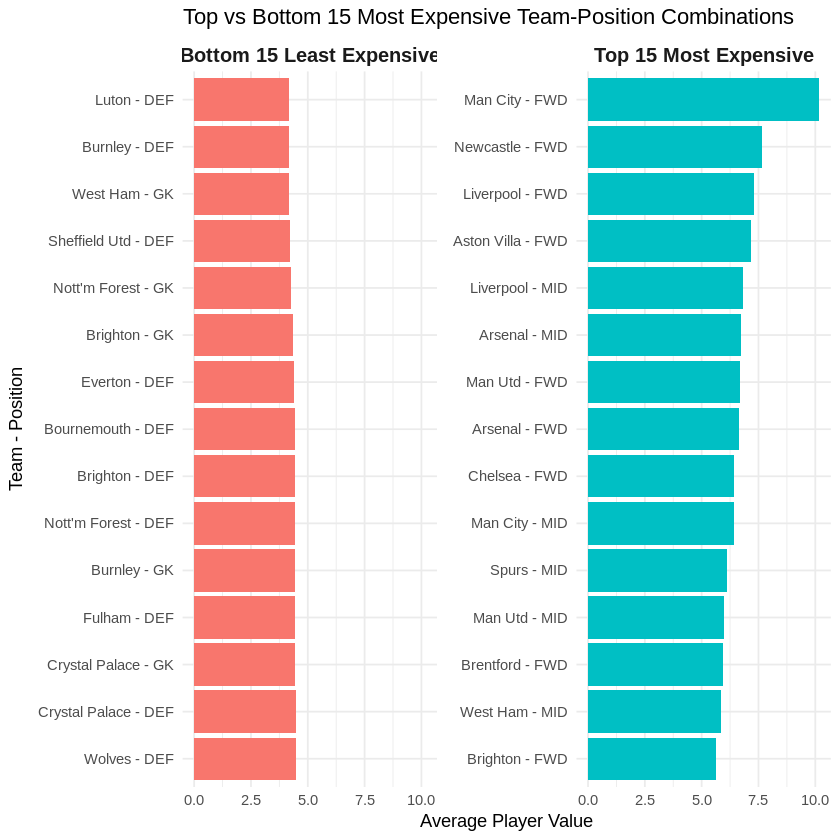

In [ ]:
library(ggplot2)
library(dplyr)

# Create a label column
value_ranked <- db01 %>%
  mutate(team_position = paste(team, position, sep = " - ")) %>%
  select(team_position, value)

# Top and bottom 15
top15 <- value_ranked %>%
  arrange(desc(value)) %>%
  slice(1:15) %>%
  mutate(rank_group = "Top 15 Most Expensive")

bottom15 <- value_ranked %>%
  arrange(value) %>%
  slice(1:15) %>%
  mutate(rank_group = "Bottom 15 Least Expensive")

# Combine for plotting (with grouping column)
combined <- bind_rows(top15, bottom15) %>%
  mutate(team_position = factor(team_position, levels = rev(team_position)))  # reverse for nicer plotting

# Plot
ggplot(combined, aes(x = team_position, y = value, fill = rank_group)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  facet_wrap(~rank_group, scales = "free_y") +
  labs(
    title = "Top vs Bottom 15 Most Expensive Team-Position Combinations",
    x = "Team - Position",
    y = "Average Player Value"
  ) +
  theme_minimal() +
  theme(strip.text = element_text(size = 12, face = "bold"))

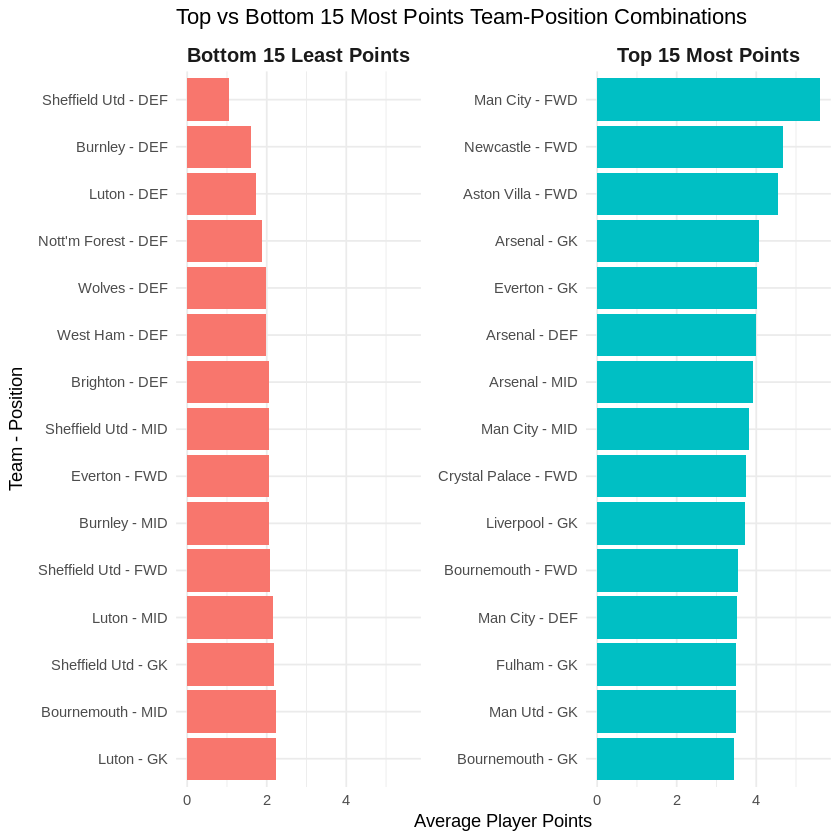

In [ ]:
library(ggplot2)
library(dplyr)

# Create a label column
value_ranked <- db01 %>%
  mutate(team_position = paste(team, position, sep = " - ")) %>%
  select(team_position, total_points)

# Top and bottom 15
top15 <- value_ranked %>%
  arrange(desc(total_points)) %>%
  slice(1:15) %>%
  mutate(rank_group = "Top 15 Most Points")

bottom15 <- value_ranked %>%
  arrange(total_points) %>%
  slice(1:15) %>%
  mutate(rank_group = "Bottom 15 Least Points")

# Combine for plotting (with grouping column)
combined <- bind_rows(top15, bottom15) %>%
  mutate(team_position = factor(team_position, levels = rev(team_position)))  # reverse for nicer plotting

# Plot
ggplot(combined, aes(x = team_position, y = total_points, fill = rank_group)) +
  geom_col(show.legend = FALSE) +
  coord_flip() +
  facet_wrap(~rank_group, scales = "free_y") +
  labs(
    title = "Top vs Bottom 15 Most Points Team-Position Combinations",
    x = "Team - Position",
    y = "Average Player Points"
  ) +
  theme_minimal() +
  theme(strip.text = element_text(size = 12, face = "bold"))

In [ ]:
# library(tidyverse)
library(tidyr)

db02 <- db01 %>%
  relocate(team, position) %>%
  pivot_longer(
    cols = total_points:value,
    names_to = "obsvar",
    values_to = "obsval"
  )

glimpse(db02)

Rows: 2,160
Columns: 4
$ team     <chr> "Arsenal", "Arsenal", "Arsenal", "Arsenal", "Arsenal", "Arsen…
$ position <chr> "DEF", "DEF", "DEF", "DEF", "DEF", "DEF", "DEF", "DEF", "DEF"…
$ obsvar   <chr> "total_points", "x_p", "assists", "bonus", "bps", "clean_shee…
$ obsval   <dbl> 3.994595e+00, 4.456757e+00, 7.027027e-02, 3.027027e-01, 1.742…


In [ ]:
db02

team,position,obsvar,obsval
<chr>,<chr>,<chr>,<dbl>
Arsenal,DEF,total_points,3.994595e+00
Arsenal,DEF,x_p,4.456757e+00
Arsenal,DEF,assists,7.027027e-02
Arsenal,DEF,bonus,3.027027e-01
Arsenal,DEF,bps,1.742703e+01
Arsenal,DEF,clean_sheets,3.945946e-01
Arsenal,DEF,creativity,8.613514e+00
Arsenal,DEF,expected_assists,4.962162e-02
Arsenal,DEF,expected_goal_involvements,1.065405e-01


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



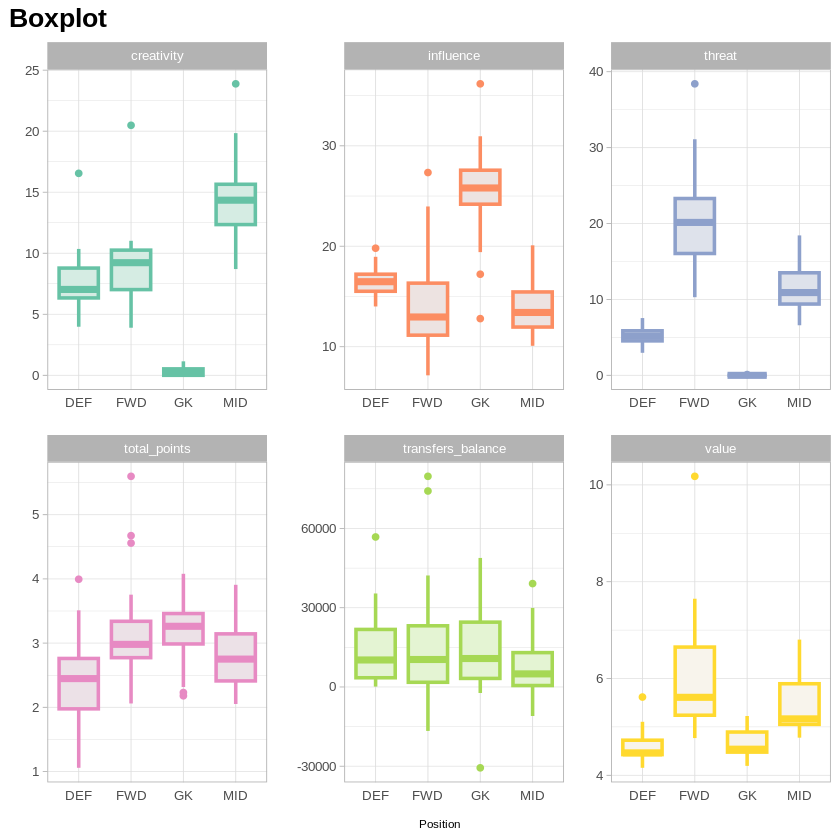

In [ ]:
install.packages("colorspace")

library(ggplot2)
library(colorspace)
library(dplyr)

# Filter and plot
db02 %>%
  filter(obsvar %in% c("total_points", "value", "influence", "creativity", "threat", "transfers_balance")) %>%
  ggplot(aes(x = position, y = obsval)) +
  geom_boxplot(
    aes(
      color = obsvar,
      fill = after_scale(desaturate(lighten(color, 0.7), 0.7))
    ),
    size = 1
  ) +
  facet_wrap(~ obsvar, scales = "free", nrow = 2) +
  scale_color_brewer(palette = "Set2") +
  theme_light() +
  labs(
    title = "Boxplot",
    x = "\nPosition",
    y = "",
    color = "Observable variables:"
  ) +
  theme(
    axis.text.x = element_text(size = 8),
    axis.ticks.x = element_blank(),
    axis.line.x = element_blank(),
    axis.title.x = element_text(size = 7),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 7),
    axis.line.y = element_blank(),
    plot.title = element_text(hjust = 0, size = 16, face = "bold"),
    plot.title.position = "plot",
    plot.subtitle = element_text(hjust = 0, size = 12),
    plot.caption = element_text(hjust = 0, size = 12),
    plot.caption.position = "plot",
    strip.text.x = element_text(size = 8),
    panel.grid.major.y = element_line(color = "grey90"),
    panel.spacing = unit(1, "lines"),
    legend.position = "none"  # Remove legend if redundant
  )

In [ ]:
ggsave("fpl_boxplot.png", width = 10, height = 6, dpi = 300)
ggsave("fpl_boxplot.pdf", width = 10, height = 6)
ggsave("fpl_boxplot.jpg", width = 10, height = 6, dpi = 300)

# Descriptive Statistics

In [ ]:
# install.packages("skimr")
# library(dplyr)
# library(skimr)

# skim(db01 %>% select(where(is.numeric))) %>%
#   as.data.frame() %>%
#   mutate(across(where(is.numeric), ~ round(.x, 2)))

In [ ]:
# summary(db01 %>% select(where(is.numeric)))

In [ ]:
install.packages("stargazer")
library(stargazer)

db01 %>%
  as.data.frame() %>%
  stargazer(type = 'text', out = "descsumm01.txt", digits = 1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic                  N    Mean    St. Dev.     Min        Max    
-----------------------------------------------------------------------
total_points               80    2.9       0.7       1.1        5.6    
x_p                        80    2.7       1.0       0.3        6.7    
assists                    80    0.1       0.1       0.0        0.3    
bonus                      80    0.2       0.1      0.03        0.7    
bps                        80   13.3       4.0       4.7       21.7    
clean_sheets               80    0.2       0.1       0.0        0.5    
creativity                 80    8.0       5.7       0.0       23.9    
expected_assists           80   0.05      0.04       0.0        0.2    
expected_goal_involvements 80    0.2       0.1       0.0        0.8    
expected_goals             80    0.1       0.1       0.0        0.6    
expected_goals_conceded    80    1.2       0.4       0.4        2.0    
goals_conceded             80    1.3       0.4       0.4       

In [ ]:
install.packages("parameters")

library(dplyr)
library(parameters)

# Get the summary as a data frame
descsumm02 <- db01 %>%
  select(where(is.numeric)) %>%
  describe_distribution()

descsumm02

# Save it as plain text
capture.output(print(descsumm02, digits = 1), file = "descsumm02.txt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
total_points,2.902290e+00,7.314568e-01,9.661105e-01,1.057971e+00,5.597015e+00,0.66525876,1.7450171,80,0
x_p,2.689117e+00,1.021760e+00,1.186225e+00,3.439614e-01,6.749254e+00,0.80741559,2.0594318,80,0
assists,7.753918e-02,6.645904e-02,8.490563e-02,0.000000e+00,3.114754e-01,1.12278891,1.7844442,80,0
bonus,2.486425e-01,1.328979e-01,1.523359e-01,2.631579e-02,6.865672e-01,1.01463030,1.1932424,80,0
bps,1.331691e+01,4.020023e+00,6.872991e+00,4.698795e+00,2.170149e+01,0.17893627,-0.9054772,80,0
clean_sheets,1.734413e-01,9.135430e-02,1.191402e-01,0.000000e+00,4.736842e-01,0.53704257,0.6505161,80,0
creativity,7.953781e+00,5.712319e+00,9.194174e+00,0.000000e+00,2.388136e+01,0.27844528,-0.3437804,80,0
expected_assists,4.921609e-02,3.850000e-02,5.928531e-02,0.000000e+00,1.733051e-01,0.58218949,0.2412924,80,0
expected_goal_involvements,1.575743e-01,1.465768e-01,2.245197e-01,0.000000e+00,7.626866e-01,1.38639539,3.2290642,80,0


# Correlation test

In [63]:
# install.packages("corrr")

library(corrr)

corr01 <- db01 %>%
  select(where(is.numeric)) %>%  # Select only numeric columns
  correlate() %>%                # Compute pairwise correlations
  # shave() %>%                    # Remove upper triangle (for clean display)
  fashion()                      # Format it for pretty printing (e.g. align decimals)

corr01

capture.output(print(corr01), file = "corr01.txt")

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,total_points,x_p,assists,bonus,bps,clean_sheets,creativity,expected_assists,expected_goal_involvements,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,⋯,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>
total_points,,.95,.30,.81,.57,.68,.13,.14,.41,⋯,.22,-.36,.20,.73,.20,-.16,.18,.37,.60,.62
x_p,.95,,.33,.69,.57,.76,.18,.21,.39,⋯,.13,-.36,.15,.74,.20,-.12,.16,.34,.57,.65
assists,.30,.33,,.29,-.33,.03,.82,.85,.80,⋯,-.35,.05,-.63,.32,-.59,.06,.20,.79,.24,.75
bonus,.81,.69,.29,,.45,.38,.08,.08,.41,⋯,.17,-.24,.16,.59,.08,-.15,.10,.42,.50,.53
bps,.57,.57,-.33,.45,,.46,-.42,-.38,-.34,⋯,.40,-.30,.71,.52,.85,-.01,.14,-.41,.41,-.04
clean_sheets,.68,.76,.03,.38,.46,,.05,.06,.09,⋯,.12,-.24,.08,.43,.28,-.38,-.08,.06,.34,.29
creativity,.13,.18,.82,.08,-.42,.05,,.96,.70,⋯,-.40,.18,-.74,.10,-.58,.02,.07,.67,.14,.58
expected_assists,.14,.21,.85,.08,-.38,.06,.96,,.69,⋯,-.38,.17,-.70,.12,-.58,.05,.14,.64,.14,.59
expected_goal_involvements,.41,.39,.80,.41,-.34,.09,.70,.69,,⋯,-.32,-.03,-.60,.38,-.63,-.00,.16,.98,.37,.86


In [ ]:
db01 %>%
  select(where(is.numeric)) %>%
  correlate() %>%
  as.data.frame() %>%
  write.csv("corr01.csv", row.names = FALSE)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


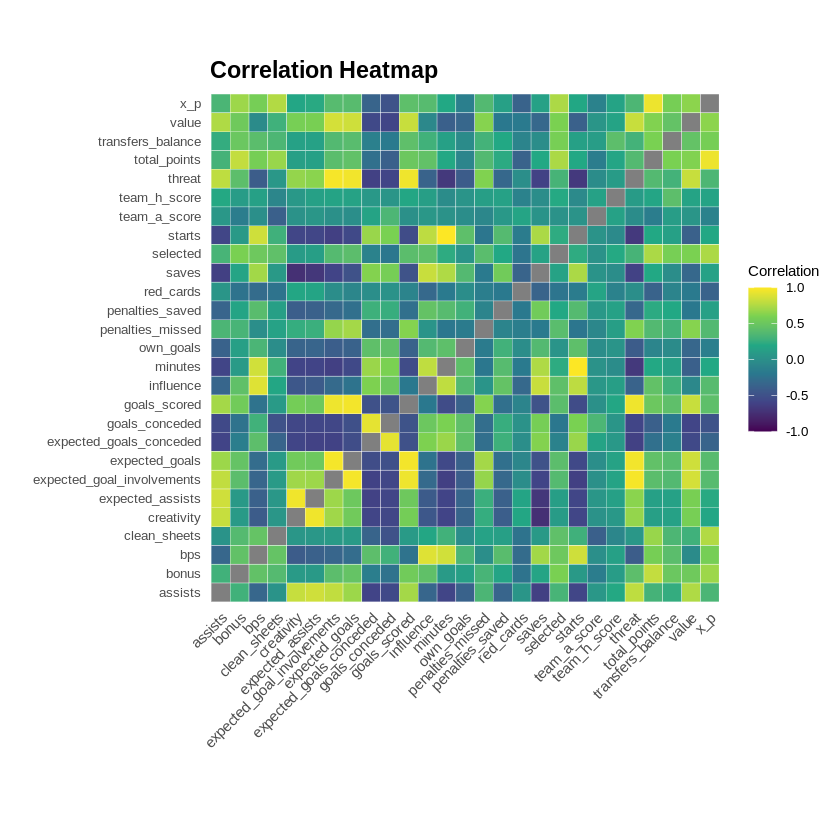

In [64]:
install.packages("viridis")

library(corrr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(viridis)

# Step 1: Compute correlations
corr_matrix <- db01 %>%
  select(where(is.numeric)) %>%
  correlate()

# Step 2: Reshape to long format
corr_long <- corr_matrix %>%
  pivot_longer(-term, names_to = "variable", values_to = "correlation")

# Step 3: Create heatmap plot object
corr_plot <- ggplot(corr_long, aes(x = term, y = variable, fill = correlation)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "D", limits = c(-1, 1), name = "Correlation") +
  coord_fixed() +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
    axis.text.y = element_text(size = 8),
    panel.grid = element_blank(),
    plot.title = element_text(size = 14, face = "bold", hjust = 0),
    legend.title = element_text(size = 9),
    legend.text = element_text(size = 8)
  ) +
  labs(title = "Correlation Heatmap", x = "", y = "")

corr_plot

# Step 4: Save to PDF
ggsave("heatmap01.pdf", plot = corr_plot, width = 11.7, height = 8.3)


In [ ]:
install.packages("tseries")

library(dplyr)
library(tseries)

unrt01 <- db02 %>%
  group_by(obsvar) %>%
  summarise(
    box.pvalue = Box.test(obsval, lag = 1, type = "Ljung-Box")$p.value,
    box = box.pvalue < 0.05,

    adf.pvalue = suppressWarnings(adf.test(obsval, alternative = "stationary")$p.value),
    adf = adf.pvalue < 0.05,

    kpss.pvalue = suppressWarnings(kpss.test(obsval)$p.value),
    kpss = kpss.pvalue > 0.05
  )

unrt01

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



obsvar,box.pvalue,box,adf.pvalue,adf,kpss.pvalue,kpss
<chr>,<dbl>,<lgl>,<dbl>,<lgl>,<dbl>,<lgl>
assists,3.971933e-05,TRUE,0.05304985,FALSE,0.10000000,TRUE
bonus,4.177940e-01,FALSE,0.07211374,FALSE,0.07162259,TRUE
bps,8.221290e-05,TRUE,0.05402966,FALSE,0.10000000,TRUE
clean_sheets,1.330729e-08,TRUE,0.05066227,FALSE,0.04184510,FALSE
creativity,5.932598e-05,TRUE,0.10221315,FALSE,0.10000000,TRUE
expected_assists,3.108916e-04,TRUE,0.01000000,TRUE,0.10000000,TRUE
expected_goal_involvements,2.753208e-07,TRUE,0.01000000,TRUE,0.10000000,TRUE
expected_goals,7.409091e-06,TRUE,0.01000000,TRUE,0.10000000,TRUE
expected_goals_conceded,4.993917e-01,FALSE,0.01000000,TRUE,0.06560855,TRUE


In [ ]:
# 1. ADF test must confirm stationarity
# 2. KPSS test must confirm stationarity
# 3. Box test can be TRUE or FALSE — lenient on this

unrt01 %>%
  filter(adf == TRUE, kpss == TRUE) %>%
  pull(obsvar)

[1] "expected_assists"           "expected_goal_involvements"
 [3] "expected_goals"             "expected_goals_conceded"   
 [5] "goals_conceded"             "influence"                 
 [7] "minutes"                    "own_goals"                 
 [9] "penalties_missed"           "penalties_saved"           
[11] "saves"                      "starts"                    
[13] "team_h_score"               "threat"                    
[15] "transfers_balance"          "value"

### ✅ **Highly Recommended Predictors**

These are **logically prior**, interpretable, and likely influence total points **without being caused by it**:

| Variable                     | Description                                       |
| ---------------------------- | ------------------------------------------------- |
| `expected_assists`           | Model-based prediction of future assists          |
| `expected_goals`             | Model-based prediction of future goals            |
| `expected_goal_involvements` | Sum of expected goals and assists                 |
| `expected_goals_conceded`    | Predictive of defensive team quality              |
| `influence`                  | Player involvement in key events                  |
| `minutes`                    | Playing time — strong baseline predictor          |
| `threat`                     | Attacking potential (shots, positions, etc)       |
| `transfers_balance`          | Net transfer trend — indicates momentum or demand |
| `value`                      | Player cost — indirectly captures quality         |

---

### ⚠️ **Use with Caution**

These may be post-outcome, highly collinear, or harder to interpret causally:

| Variable           | Reason for caution                            |
| ------------------ | --------------------------------------------- |
| `goals_conceded`   | Can be **outcome-driven**, not predictive     |
| `own_goals`        | Rare events, high noise                       |
| `penalties_missed` | Low frequency, not generalizable              |
| `penalties_saved`  | Goalkeeper-only and sparse                    |
| `saves`            | Goalkeeper-only, context-dependent            |
| `starts`           | Often redundant with `minutes`                |
| `team_h_score`     | Match-level outcome, not individual predictor |

---

# Simple OLS

In [ ]:
### Feature Subset

# important_vars <- c(
#   "total_points", "position", "team", "x_p", "assists", "bonus", "bps",
#   "clean_sheets", "creativity", "expected_assists", "expected_goal_involvements",
#   "expected_goals", "expected_goals_conceded", "goals_conceded", "goals_scored",
#   "influence", "minutes", "own_goals", "penalties_missed",
#   "penalties_saved", "red_cards", "saves", "selected", "starts", "team_a_score",
#   "team_h_score", "threat", "transfers_balance", "value"
# )

important_vars <- c(
    "total_points", "position", "team", "expected_assists", "expected_goals",
    "expected_goal_involvements", "expected_goals_conceded", "influence",
    "minutes", "threat", "transfers_balance", "value")

db03 <- db00 %>%
  mutate(value = value / 10) %>%
  select(all_of(important_vars)) %>%
  filter(minutes != 0) %>%
  relocate(total_points)

glimpse(db03)

Rows: 11,384
Columns: 12
$ total_points               <dbl> 1, 2, 1, 1, 2, 2, 4, 2, 3, 8, 7, 1, 3, 1, 2…
$ position                   <chr> "MID", "MID", "MID", "MID", "DEF", "MID", "…
$ team                       <chr> "Man Utd", "Brentford", "Sheffield Utd", "L…
$ expected_assists           <dbl> 0.05, 0.01, 0.01, 0.01, 0.42, 0.01, 0.61, 0…
$ expected_goals             <dbl> 0.00, 0.02, 0.00, 0.00, 0.03, 0.12, 0.00, 0…
$ expected_goal_involvements <dbl> 0.05, 0.03, 0.01, 0.01, 0.45, 0.13, 0.61, 0…
$ expected_goals_conceded    <dbl> 1.08, 1.26, 0.00, 0.24, 1.23, 2.01, 0.40, 2…
$ influence                  <dbl> 3.8, 14.6, 0.0, 4.6, 11.4, 0.0, 19.2, 0.0, …
$ minutes                    <dbl> 22, 90, 3, 24, 75, 86, 10, 90, 90, 72, 89, …
$ threat                     <dbl> 8, 17, 0, 0, 3, 0, 2, 0, 0, 36, 23, 4, 9, 7…
$ transfers_balance          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ value                      <dbl> 7.0, 5.5, 4.5, 5.0, 5.5, 5.0, 5.0, 5.0, 6.5…


In [ ]:
db03_def <- db03 %>%
  filter(position == "DEF") %>%
  select(-position)

db03_def$team <- factor(db03_def$team)

In [ ]:
db03_def$team <- relevel(db03_def$team, ref = "Man City")

ols_def <- lm(total_points ~ ., data = db03_def)

summary(ols_def)


Call:
lm(formula = total_points ~ ., data = db03_def)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6576 -1.3918 -0.2894  0.9039 10.0568 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.438e+00  4.183e-01   3.439 0.000591 ***
teamArsenal                 2.782e-01  2.222e-01   1.252 0.210592    
teamAston Villa            -4.464e-01  2.222e-01  -2.009 0.044570 *  
teamBournemouth            -3.816e-01  2.293e-01  -1.664 0.096177 .  
teamBrentford              -6.209e-01  2.278e-01  -2.725 0.006459 ** 
teamBrighton               -1.044e+00  2.310e-01  -4.520 6.37e-06 ***
teamBurnley                -8.362e-01  2.350e-01  -3.558 0.000378 ***
teamChelsea                -7.702e-01  2.209e-01  -3.487 0.000495 ***
teamCrystal Palace         -3.627e-01  2.260e-01  -1.605 0.108639    
teamEverton                -2.422e-01  2.279e-01  -1.063 0.288051    
teamFulham                 -3.346e-01  2.317e-01  -1.444 0.148721 

In [ ]:
ols_defsw <- step(ols_def, direction = "both")

summary(ols_defsw)

Start:  AIC=5881.54
total_points ~ team + expected_assists + expected_goals + expected_goal_involvements + 
    expected_goals_conceded + influence + minutes + threat + 
    transfers_balance + value

                             Df Sum of Sq   RSS    AIC
- value                       1       1.3 17491 5879.8
- expected_goals              1       2.3 17492 5880.0
- expected_assists            1       2.4 17492 5880.1
- expected_goal_involvements  1       2.4 17492 5880.1
<none>                                    17490 5881.5
- transfers_balance           1      24.0 17514 5884.8
- threat                      1      57.2 17547 5892.1
- minutes                     1     206.7 17696 5924.7
- team                       19     446.7 17936 5940.5
- expected_goals_conceded     1    2737.2 20227 6438.3
- influence                   1    5671.1 23161 6958.8

Step:  AIC=5879.83
total_points ~ team + expected_assists + expected_goals + expected_goal_involvements + 
    expected_goals_conceded + i


Call:
lm(formula = total_points ~ team + expected_assists + expected_goal_involvements + 
    expected_goals_conceded + influence + minutes + threat + 
    transfers_balance, data = db03_def)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6621 -1.3927 -0.2843  0.9080 10.0477 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.236e+00  1.819e-01   6.795 1.26e-11 ***
teamArsenal                 2.747e-01  2.221e-01   1.237 0.216091    
teamAston Villa            -4.269e-01  2.193e-01  -1.947 0.051639 .  
teamBournemouth            -3.569e-01  2.244e-01  -1.591 0.111794    
teamBrentford              -5.971e-01  2.235e-01  -2.671 0.007590 ** 
teamBrighton               -1.023e+00  2.261e-01  -4.524 6.25e-06 ***
teamBurnley                -8.065e-01  2.244e-01  -3.594 0.000329 ***
teamChelsea                -7.561e-01  2.193e-01  -3.448 0.000571 ***
teamCrystal Palace         -3.385e-01  2.213e-01  -1.530 0.126211   

In [68]:
install.packages("MuMIn")
library(MuMIn)

options(na.action = "na.fail")
ols_mumin <- get.models(dredge(ols_def, rank = "AICc"), 1)[[1]]
summary(ols_mumin)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Fixed term is "(Intercept)"




Call:
lm(formula = total_points ~ expected_assists + expected_goal_involvements + 
    expected_goals_conceded + influence + minutes + team + threat + 
    transfers_balance + 1, data = db03_def)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6621 -1.3927 -0.2843  0.9080 10.0477 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.236e+00  1.819e-01   6.795 1.26e-11 ***
expected_assists           -1.141e+00  5.544e-01  -2.057 0.039713 *  
expected_goal_involvements  1.842e+00  4.346e-01   4.238 2.30e-05 ***
expected_goals_conceded    -1.044e+00  4.261e-02 -24.492  < 2e-16 ***
influence                   1.273e-01  3.621e-03  35.171  < 2e-16 ***
minutes                     1.040e-02  1.551e-03   6.700 2.38e-11 ***
teamArsenal                 2.747e-01  2.221e-01   1.237 0.216091    
teamAston Villa            -4.269e-01  2.193e-01  -1.947 0.051639 .  
teamBournemouth            -3.569e-01  2.244e-01  -1.591 0.11179

In [87]:
ols_defdr <- lm(
    total_points ~ influence + expected_goal_involvements + expected_goals_conceded +
    minutes + threat + transfers_balance + team, data = db03_def)

summary(ols_defdr)


Call:
lm(formula = total_points ~ influence + expected_goal_involvements + 
    expected_goals_conceded + minutes + threat + transfers_balance + 
    team, data = db03_def)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8053 -1.3867 -0.2870  0.9036 10.3638 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.224e+00  1.819e-01   6.727 1.99e-11 ***
influence                   1.266e-01  3.604e-03  35.127  < 2e-16 ***
expected_goal_involvements  1.193e+00  2.993e-01   3.987 6.80e-05 ***
expected_goals_conceded    -1.039e+00  4.257e-02 -24.407  < 2e-16 ***
minutes                     1.027e-02  1.551e-03   6.619 4.11e-11 ***
threat                      2.573e-02  5.133e-03   5.012 5.62e-07 ***
transfers_balance           9.476e-07  4.482e-07   2.114 0.034568 *  
teamArsenal                 2.866e-01  2.221e-01   1.291 0.196890    
teamAston Villa            -4.178e-01  2.194e-01  -1.905 0.056911 .  
teamBournemouth  

In [88]:
# install.packages("olsrr")
library(olsrr)

ols_step_both_p(ols_def)



                                          Stepwise Summary                                          
--------------------------------------------------------------------------------------------------
Step    Variable                             AIC          SBC         SBIC        R2       Adj. R2 
--------------------------------------------------------------------------------------------------
 0      Base Model                        19202.853    19215.361    8295.510    0.00000    0.00000 
 1      influence (+)                     17685.768    17704.530    6778.863    0.32651    0.32634 
 2      expected_goals_conceded (+)       17006.248    17031.264    6099.916    0.43596    0.43566 
 3      expected_goals (+)                16931.231    16962.501    6024.934    0.44715    0.44672 
 4      minutes (+)                       16870.382    16907.906    5964.162    0.45612    0.45555 
 5      threat (+)                        16858.708    16902.486    5952.480    0.45805    0.45734 

In [89]:
ols_defrr <- lm(
    total_points ~ influence + expected_goals + expected_goals_conceded +
    minutes + threat + transfers_balance + team, data = db03_def)

summary(ols_defrr)


Call:
lm(formula = total_points ~ influence + expected_goals + expected_goals_conceded + 
    minutes + threat + transfers_balance + team, data = db03_def)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5252 -1.3979 -0.2892  0.9041 10.0681 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)              1.251e+00  1.818e-01   6.884 6.77e-12 ***
influence                1.284e-01  3.575e-03  35.925  < 2e-16 ***
expected_goals           1.773e+00  4.331e-01   4.093 4.34e-05 ***
expected_goals_conceded -1.049e+00  4.251e-02 -24.684  < 2e-16 ***
minutes                  1.057e-02  1.549e-03   6.821 1.05e-11 ***
threat                   2.113e-02  5.769e-03   3.663 0.000253 ***
transfers_balance        1.110e-06  4.467e-07   2.484 0.013031 *  
teamArsenal              2.639e-01  2.220e-01   1.189 0.234633    
teamAston Villa         -4.311e-01  2.194e-01  -1.965 0.049455 *  
teamBournemouth         -3.669e-01  2.244e-01  -1.635 0.102120  

In [ ]:
# # install.packages("patchwork")
# library(sjPlot)
# library(patchwork)

# # Create individual plots
# p1 <- plot_model(ols_defdr,
#                  type = "est",
#                  show.values = TRUE,
#                  value.offset = 0.3,
#                  title = "OLS (Corrected AIC Model)",
#                  vline.color = "gray50") +
#   theme_minimal()

# p2 <- plot_model(ols_defrr,
#                  type = "est",
#                  show.values = TRUE,
#                  value.offset = 0.3,
#                  title = "OLS (OLSrr Stepwise Model)",
#                  vline.color = "gray50") +
#   theme_minimal()

# # Combine side by side
# p1 + p2

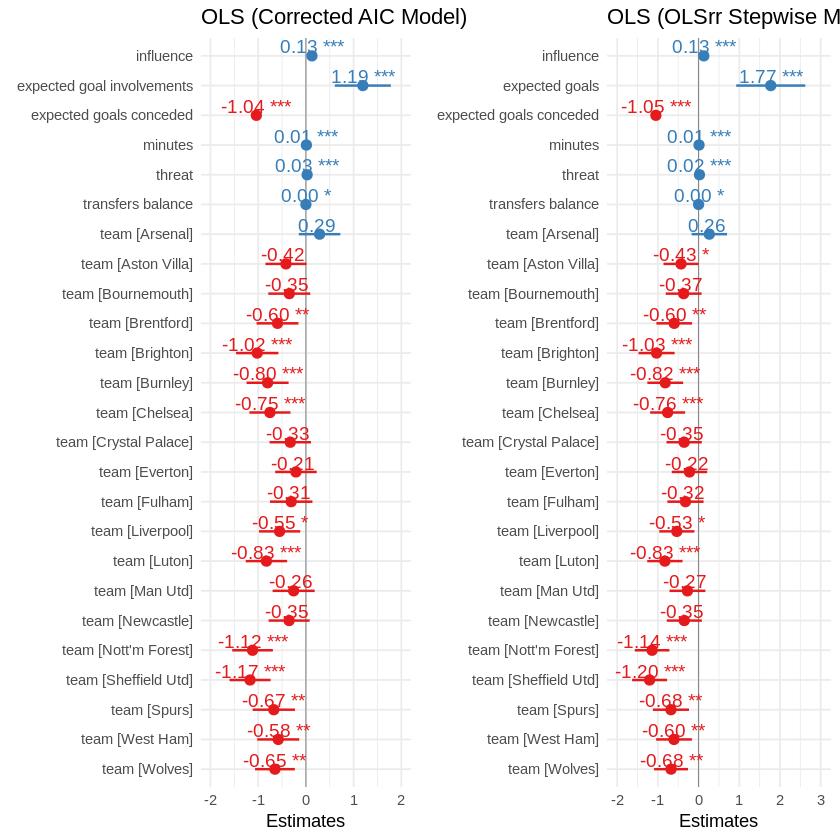

In [91]:
# install.packages("gridExtra")
library(gridExtra)

p1 <- plot_model(ols_defdr,
                 type = "est",
                 show.values = TRUE,
                 value.offset = 0.3,
                 title = "OLS (Corrected AIC Model)",
                 vline.color = "gray50") +
  theme_minimal()

p2 <- plot_model(ols_defrr,
                 type = "est",
                 show.values = TRUE,
                 value.offset = 0.3,
                 title = "OLS (OLSrr Stepwise Model)",
                 vline.color = "gray50") +
  theme_minimal()

grid.arrange(p1, p2, ncol = 2)

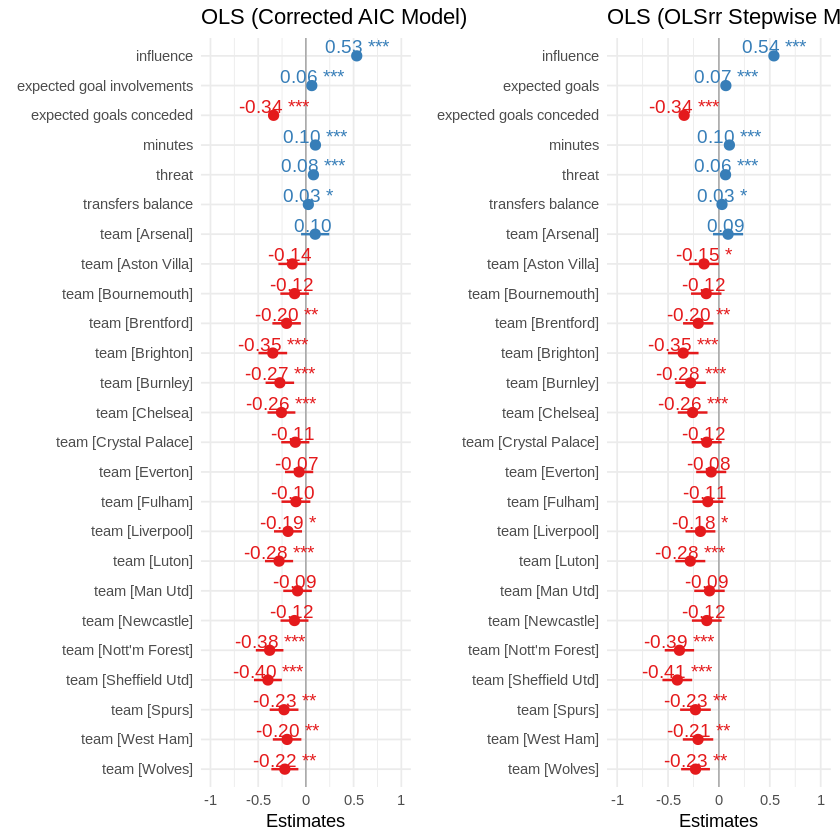

In [92]:
# install.packages("gridExtra")
library(gridExtra)

p1 <- plot_model(ols_defdr,
                 type = "std",
                 show.values = TRUE,
                 value.offset = 0.3,
                 title = "OLS (Corrected AIC Model)",
                 vline.color = "gray50") +
  theme_minimal()

p2 <- plot_model(ols_defrr,
                 type = "std",
                 show.values = TRUE,
                 value.offset = 0.3,
                 title = "OLS (OLSrr Stepwise Model)",
                 vline.color = "gray50") +
  theme_minimal()

grid.arrange(p1, p2, ncol = 2)

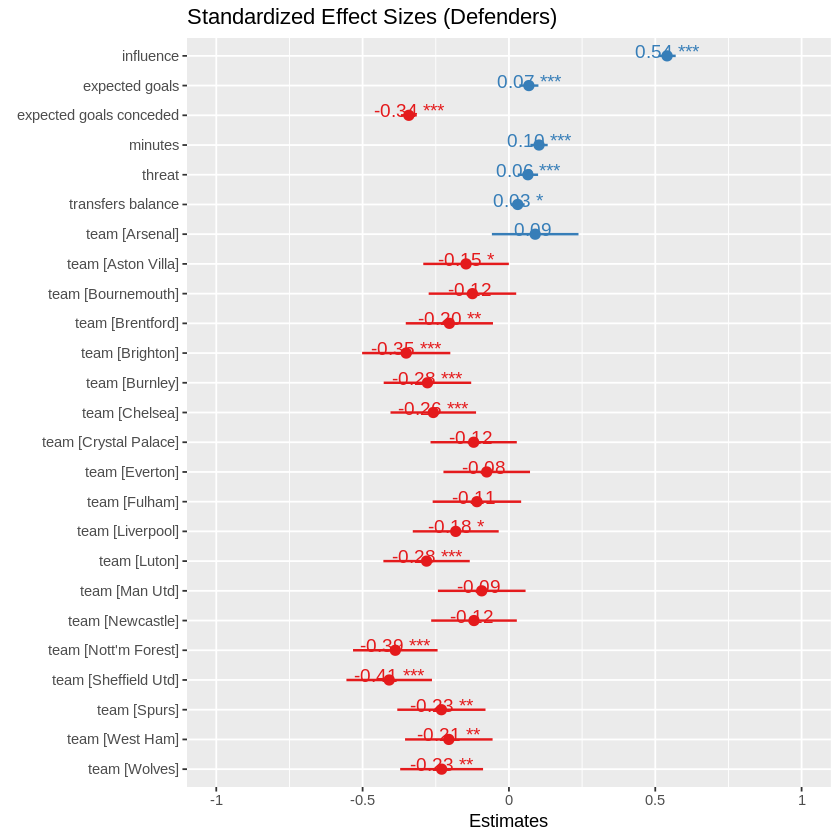

In [121]:
plot_model(ols_defrr,
           type = "std",
           show.values = TRUE,
           title = "Standardized Effect Sizes (Defenders)")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



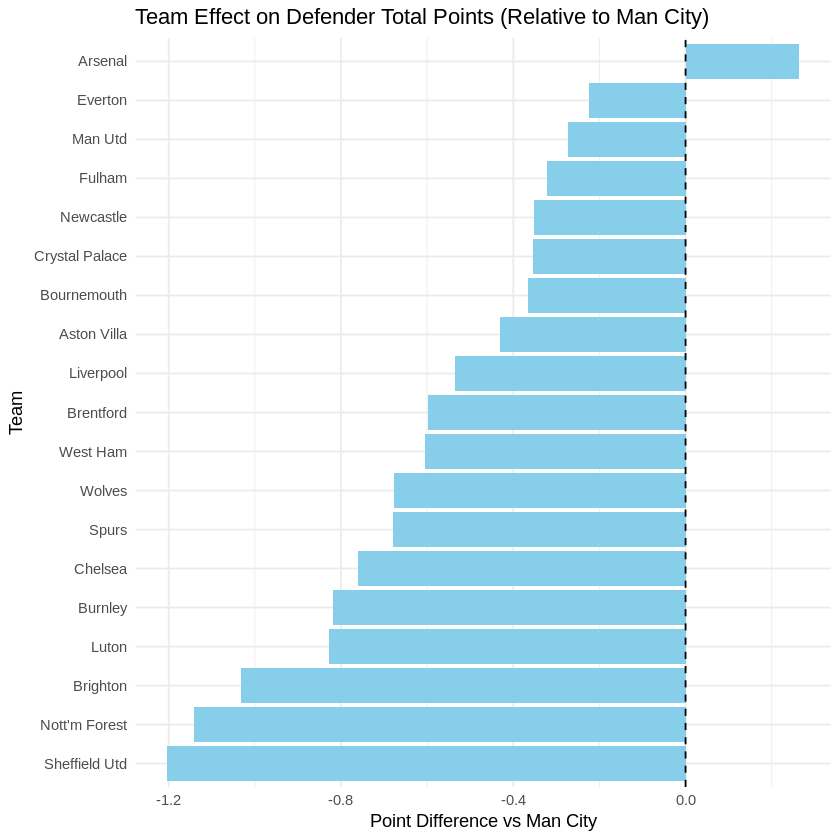

In [93]:
install.packages("broom")

library(broom)
library(ggplot2)

tidy(ols_defrr) %>%
  filter(grepl("team", term)) %>%
  mutate(term = gsub("team", "", term)) %>%
  ggplot(aes(x = reorder(term, estimate), y = estimate)) +
  geom_col(fill = "skyblue") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  coord_flip() +
  labs(
    title = "Team Effect on Defender Total Points (Relative to Man City)",
    x = "Team",
    y = "Point Difference vs Man City"
  ) +
  theme_minimal()

In [94]:
# install.packages("caret")

library(caret)

# Get variable importance
importance <- varImp(ols_defrr, scale = TRUE)
print(importance)

                          Overall
influence               35.924754
expected_goals           4.093500
expected_goals_conceded 24.684040
minutes                  6.821161
threat                   3.662543
transfers_balance        2.484077
teamArsenal              1.188697
teamAston Villa          1.965278
teamBournemouth          1.635053
teamBrentford            2.677447
teamBrighton             4.566612
teamBurnley              3.651234
teamChelsea              3.467578
teamCrystal Palace       1.602706
teamEverton              1.005508
teamFulham               1.419156
teamLiverpool            2.427147
teamLuton                3.739149
teamMan Utd              1.216711
teamNewcastle            1.599370
teamNott'm Forest        5.268678
teamSheffield Utd        5.488402
teamSpurs                3.001967
teamWest Ham             2.692989
teamWolves               3.184447


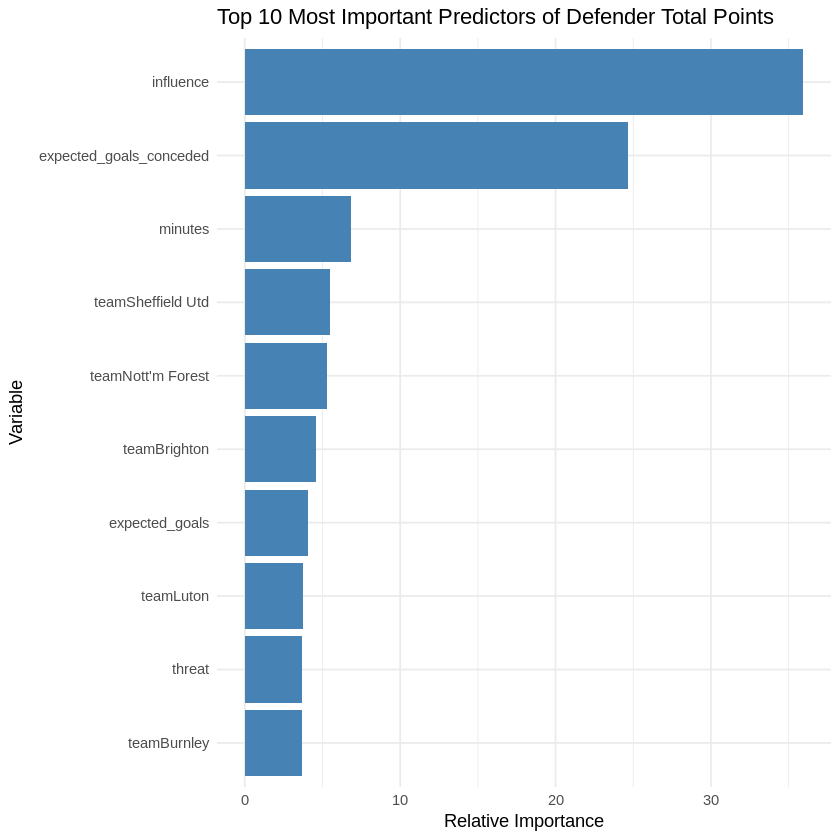

In [95]:
library(ggplot2)

importance_df <- as.data.frame(importance)
importance_df$Variable <- rownames(importance_df)

importance_df %>%
  arrange(desc(Overall)) %>%
  slice(1:10) %>%
  ggplot(aes(x = reorder(Variable, Overall), y = Overall)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 10 Most Important Predictors of Defender Total Points",
    x = "Variable",
    y = "Relative Importance"
  ) +
  theme_minimal()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



26 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)              9.095889e-01
influence                1.278224e-01
expected_goals           1.715403e+00
expected_goals_conceded -1.048647e+00
minutes                  1.044041e-02
threat                   2.135040e-02
transfers_balance        1.014893e-06
teamArsenal              5.845609e-01
teamAston Villa         -2.479762e-02
teamBournemouth          .           
teamBrentford           -1.901163e-01
teamBrighton            -6.235486e-01
teamBurnley             -4.135436e-01
teamChelsea             -3.527327e-01
teamCrystal Palace       .           
teamEverton              9.603681e-02
teamFulham               .           
teamLiverpool           -1.238946e-01
teamLuton               -4.226817e-01
teamMan Utd              4.323619e-02
teamNewcastle            .           
teamNott'm Forest       -7.392466e-01
teamSheffield Utd       -8.014502e-01
teamSpurs               -2.637118e-01
teamWest

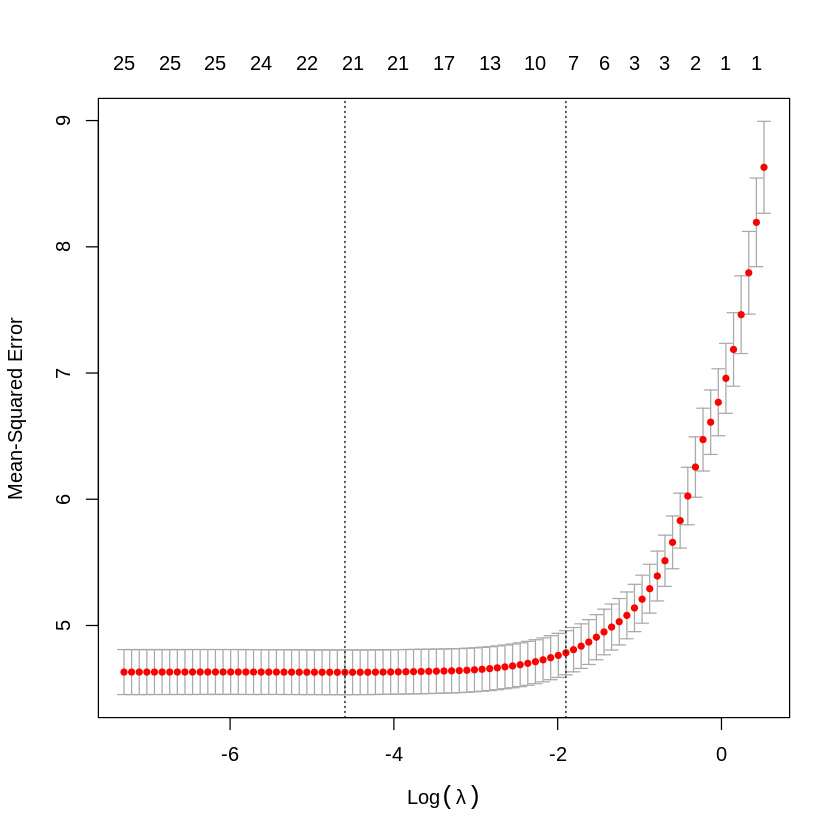

In [96]:
install.packages("glmnet")

library(glmnet)
library(dplyr)

# Use defender data
df <- db03_def  # assuming this includes `total_points` and all predictors

# Create predictor matrix (excluding total_points)
x <- model.matrix(total_points ~ influence + expected_goals + expected_goals_conceded +
    minutes + threat + transfers_balance + team, data = df)[, -1]  # drop intercept column

# Response variable
y <- df$total_points

set.seed(42)  # for reproducibility

cv_lasso <- cv.glmnet(
  x = x,
  y = y,
  alpha = 1,              # LASSO penalty
  standardize = TRUE,
  nfolds = 10
)

best_lambda <- cv_lasso$lambda.min
lasso_model <- glmnet(x, y, alpha = 1, lambda = best_lambda)

# Coefficients
coef(lasso_model)

plot(cv_lasso)

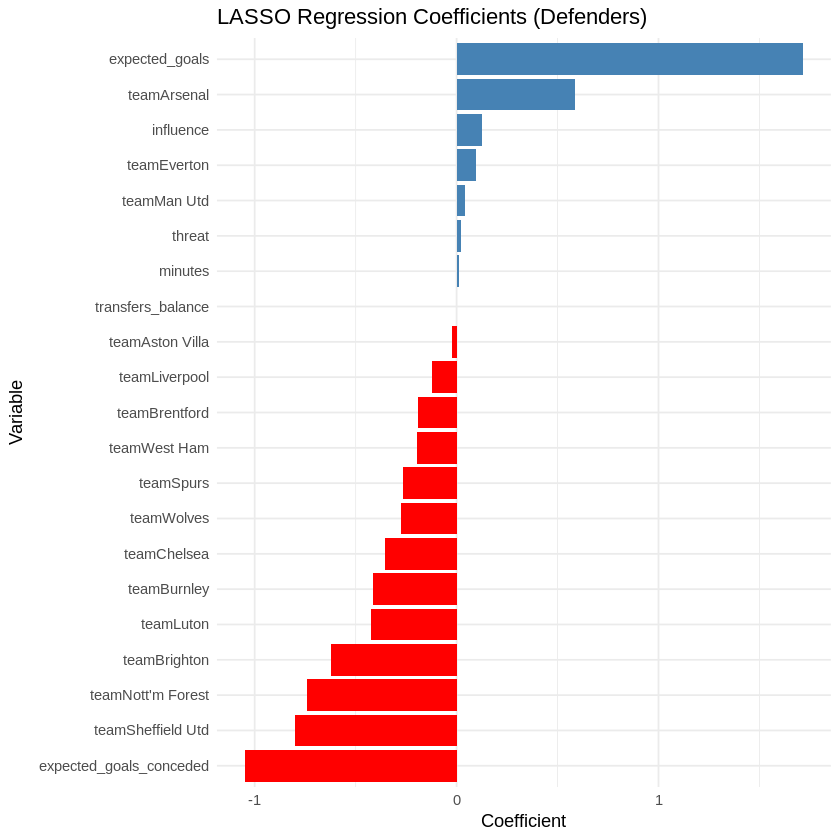

In [97]:
library(ggplot2)
library(dplyr)
library(tibble)

# Convert sparse matrix to tidy data frame
lasso_coef <- coef(lasso_model) %>%
  as.matrix() %>%
  as.data.frame() %>%
  rownames_to_column("Variable") %>%
  rename(Coefficient = s0) %>%
  filter(Variable != "(Intercept)") %>%
  mutate(abs_coef = abs(Coefficient)) %>%
  filter(abs_coef > 0)  # Drop coefficients that were zeroed out by LASSO

# Plot: ranked bar chart
ggplot(lasso_coef, aes(x = reorder(Variable, Coefficient), y = Coefficient, fill = Coefficient > 0)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = c("red", "steelblue"), guide = "none") +
  labs(
    title = "LASSO Regression Coefficients (Defenders)",
    x = "Variable",
    y = "Coefficient"
  ) +
  theme_minimal()

In [99]:
lasso_coef <- coef(lasso_model) %>%
  as.matrix() %>%
  as.data.frame() %>%
  rownames_to_column("Variable") %>%
  rename(LASSO = s0)

ols_coef <- summary(ols_defrr)$coefficients %>%
  as.data.frame() %>%
  rownames_to_column("Variable") %>%
  select(Variable, Estimate) %>%
  rename(OLS = Estimate)

# Join by variable
compare_coef <- full_join(ols_coef, lasso_coef, by = "Variable") %>%
  filter(Variable != "(Intercept)") %>%
  mutate(across(c(OLS, LASSO), ~replace_na(., 0)))  # fill missing with 0

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



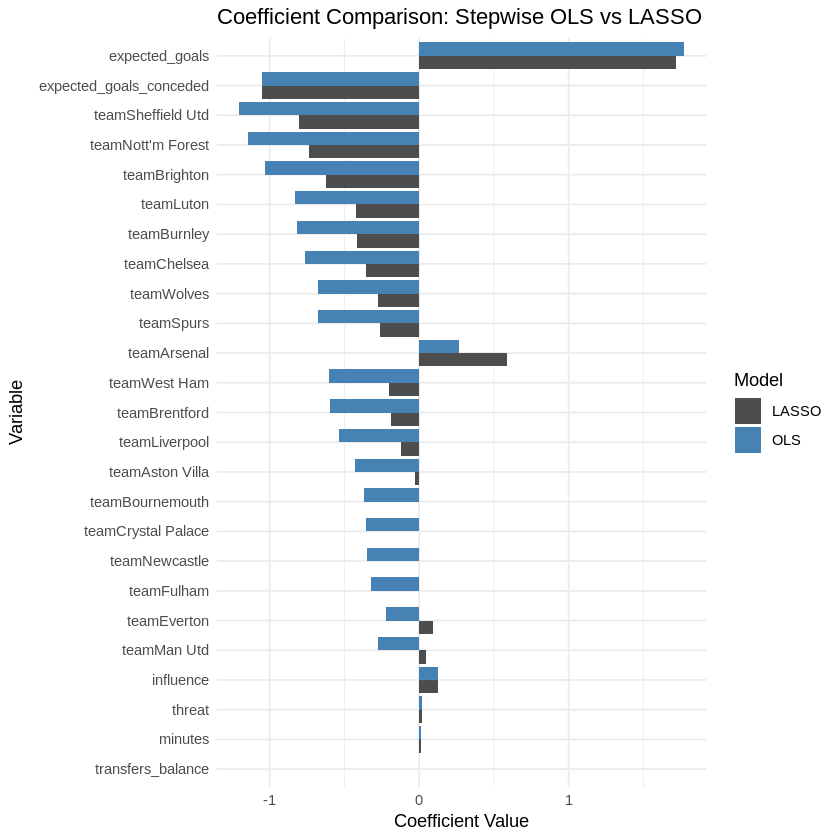

In [100]:
install.packages("tidyr")
library(tidyr)

install.packages("forcats")  # Only once
library(forcats)

compare_coef %>%
  pivot_longer(cols = c(OLS, LASSO), names_to = "Model", values_to = "Coefficient") %>%
  mutate(Variable = fct_reorder(Variable, abs(Coefficient))) %>%
  ggplot(aes(x = Coefficient, y = Variable, fill = Model)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = c("gray30", "steelblue")) +
  labs(
    title = "Coefficient Comparison: Stepwise OLS vs LASSO",
    x = "Coefficient Value", y = "Variable"
  ) +
  theme_minimal()

In [101]:
# Predict using stepwise OLS
pred_ols <- predict(ols_defrr, newdata = db03_def)

# Actual values
y_true <- db03_def$total_points

# Compute R² and MSE
r2_ols <- 1 - sum((y_true - pred_ols)^2) / sum((y_true - mean(y_true))^2)
mse_ols <- mean((y_true - pred_ols)^2)

# Predict using LASSO (best_lambda)
pred_lasso <- predict(lasso_model, newx = x, s = best_lambda)

# Compute R² and MSE
r2_lasso <- 1 - sum((y_true - pred_lasso)^2) / sum((y_true - mean(y_true))^2)
mse_lasso <- mean((y_true - pred_lasso)^2)

cat("📊 Model Fit Comparison:\n")
cat("Stepwise OLS AICc:\n")
cat("  R²  =", round(r2_ols, 4), "\n")
cat("  MSE =", round(mse_ols, 4), "\n\n")

cat("LASSO:\n")
cat("  R²  =", round(r2_lasso, 4), "\n")
cat("  MSE =", round(mse_lasso, 4), "\n")


📊 Model Fit Comparison:
Stepwise OLS AICc:
  R²  = 0.4735 
  MSE = 4.5561 

LASSO:
  R²  = 0.4725 
  MSE = 4.5643 


In [ ]:
# Fit LASSO model across all lambda values (already done)
# lasso_model <- glmnet(x, y, alpha = 1)

# Plot coefficient paths
# plot(lasso_model, xvar = "lambda", label = TRUE)
# title("LASSO Coefficient Paths")


In [102]:
# At optimal lambda (lowest CV error)
coef_min <- coef(cv_lasso, s = "lambda.min")

# At 1-SE lambda (simpler model)
coef_1se <- coef(cv_lasso, s = "lambda.1se")

In [103]:
coef_min

26 x 1 sparse Matrix of class "dgCMatrix"
                                   s0
(Intercept)              9.091416e-01
influence                1.278183e-01
expected_goals           1.713002e+00
expected_goals_conceded -1.048686e+00
minutes                  1.044012e-02
threat                   2.137665e-02
transfers_balance        1.015569e-06
teamArsenal              5.852262e-01
teamAston Villa         -2.400891e-02
teamBournemouth          .           
teamBrentford           -1.893338e-01
teamBrighton            -6.228020e-01
teamBurnley             -4.127797e-01
teamChelsea             -3.519696e-01
teamCrystal Palace       .           
teamEverton              9.679956e-02
teamFulham               .           
teamLiverpool           -1.231172e-01
teamLuton               -4.218682e-01
teamMan Utd              4.403147e-02
teamNewcastle            .           
teamNott'm Forest       -7.385292e-01
teamSheffield Utd       -8.008112e-01
teamSpurs               -2.630924e-01
teamWest

In [104]:
# Convert sparse matrix to data frame
library(tibble)

coef_df_min <- as.data.frame(as.matrix(coef_min)) %>%
  rownames_to_column("Variable") %>%
  rename(Coefficient = 2) %>%
  filter(Coefficient != 0)

# Optional: Save to CSV
write.csv(coef_df_min, "lasso01.csv", row.names = FALSE)

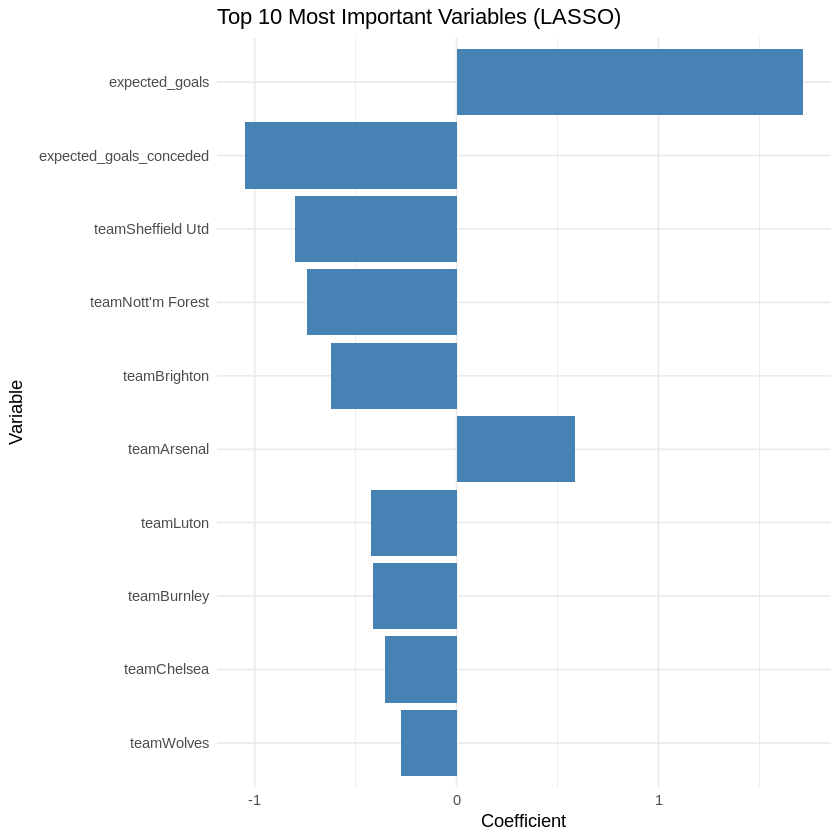

In [105]:
library(tibble)
library(ggplot2)

coef_df <- as.data.frame(as.matrix(coef(lasso_model)))
coef_df$Variable <- rownames(coef_df)
colnames(coef_df)[1] <- "Coefficient"

coef_df %>%
  filter(Variable != "(Intercept)") %>%
  mutate(abs_coef = abs(Coefficient)) %>%
  arrange(desc(abs_coef)) %>%
  slice(1:10) %>%
  ggplot(aes(x = reorder(Variable, abs_coef), y = Coefficient)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(
    title = "Top 10 Most Important Variables (LASSO)",
    x = "Variable", y = "Coefficient"
  ) +
  theme_minimal()

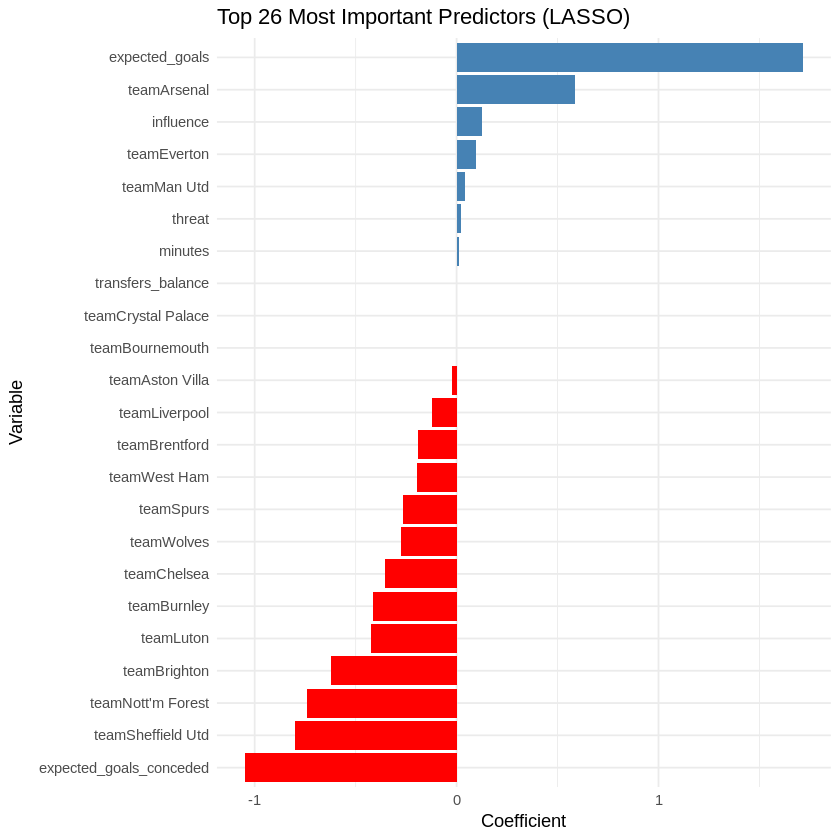

In [106]:
library(tibble)
library(ggplot2)
library(dplyr)

# Convert LASSO coefficients to a tidy dataframe
coef_df <- as.data.frame(as.matrix(coef(lasso_model)))
coef_df$Variable <- rownames(coef_df)
colnames(coef_df)[1] <- "Coefficient"

# Filter out intercept and rank top 10 by absolute coefficient size
coef_df %>%
  filter(Variable != "(Intercept)") %>%
  mutate(abs_coef = abs(Coefficient)) %>%
  arrange(desc(abs_coef)) %>%
  slice(1:23) %>%
  ggplot(aes(x = reorder(Variable, Coefficient), y = Coefficient, fill = Coefficient > 0)) +
  geom_col() +
  coord_flip() +
  scale_fill_manual(values = c("red", "steelblue"), guide = "none") +
  labs(
    title = "Top 26 Most Important Predictors (LASSO)",
    x = "Variable",
    y = "Coefficient"
  ) +
  theme_minimal()

In [107]:
library(dplyr)
library(ggplot2)

team_stats <- db03_def %>%
  group_by(team) %>%
  summarise(
    avg_points = mean(total_points, na.rm = TRUE),
    avg_expected_goals = mean(expected_goals, na.rm = TRUE),
    # avg_expected_goal_involvements = mean(expected_goal_involvements, na.rm = TRUE),
    avg_expected_goals_conceded = mean(expected_goals_conceded, na.rm = TRUE),
    avg_influence = mean(influence, na.rm = TRUE),
    avg_threat = mean(threat, na.rm = TRUE),
    avg_minutes = mean(minutes, na.rm = TRUE),
    count = n()
  ) %>%
  arrange(desc(avg_points))

team_stats

team,avg_points,avg_expected_goals,avg_expected_goals_conceded,avg_influence,avg_threat,avg_minutes,count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Arsenal,3.994595,0.05691892,0.6034054,16.29297,6.059459,72.30811,185
Man City,3.510638,0.06005319,0.7817021,15.62128,7.101064,75.13298,188
Liverpool,3.191710,0.06113990,0.9708808,18.94922,7.544041,71.30570,193
Everton,2.856383,0.04781915,1.2946277,16.76809,5.760638,77.12766,188
Crystal Palace,2.790576,0.03429319,1.2686911,17.16859,4.115183,81.10995,191
Newcastle,2.751244,0.04368159,1.2548756,17.36219,5.233831,67.44776,201
Spurs,2.685083,0.06707182,1.4755249,19.80442,6.591160,75.39227,181
Fulham,2.590909,0.02954545,1.4965909,17.56932,4.676136,77.64205,176
Brentford,2.502732,0.05032787,1.2687432,16.97049,5.803279,74.08743,183


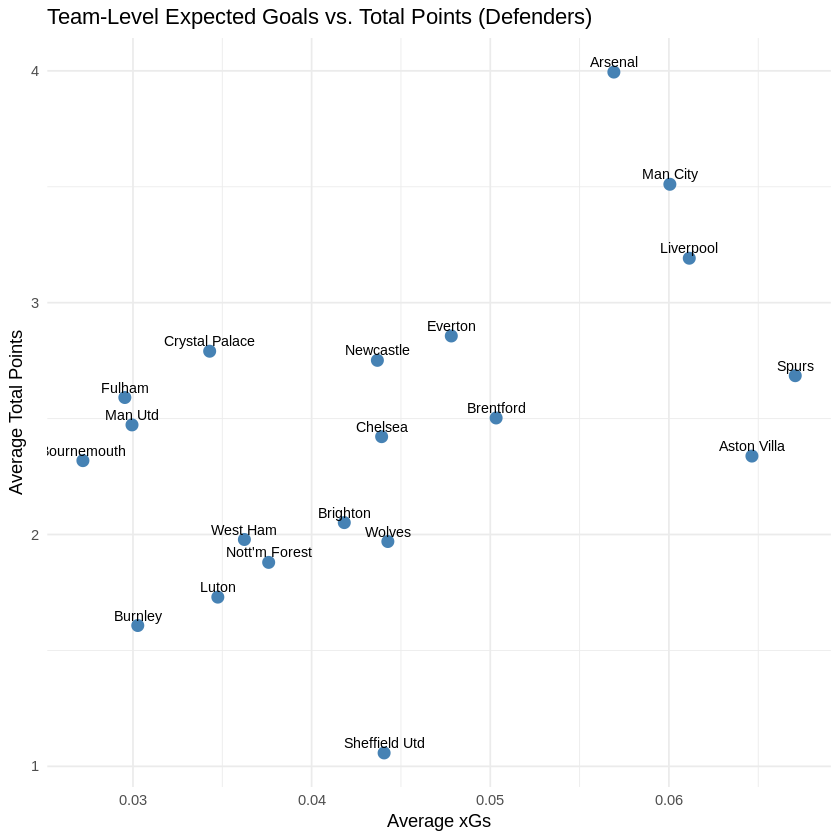

In [108]:
ggplot(team_stats, aes(x = avg_expected_goals, y = avg_points, label = team)) +
  geom_point(color = "steelblue", size = 3) +
  geom_text(vjust = -0.5, size = 3) +
  labs(
    title = "Team-Level Expected Goals vs. Total Points (Defenders)",
    x = "Average xGs",
    y = "Average Total Points"
  ) +
  theme_minimal()

In [ ]:
# # Required packages
# install.packages("car")
# install.packages("lmtest")

# library(car)
# library(lmtest)

# # ---- 1. Model Summary ----
# cat("\n📊 Model Summary:\n")
# print(summary(ols_defsw))

# # ---- 2. Multicollinearity Check ----
# cat("\n🔁 Variance Inflation Factor (VIF):\n")
# print(vif(ols_defsw))

# # ---- 3. Heteroskedasticity Test (Breusch–Pagan) ----
# cat("\n📈 Breusch–Pagan Test for Heteroskedasticity:\n")
# print(bptest(ols_defsw))

# # ---- 4. Autocorrelation Check (Durbin-Watson) ----
# cat("\n🔄 Durbin–Watson Test for Autocorrelation:\n")
# print(dwtest(ols_defsw))

# # ---- 5. Normality of Residuals ----
# cat("\n🧪 Shapiro-Wilk Test for Normality of Residuals:\n")
# print(shapiro.test(residuals(ols_defsw)))

# # ---- 6. Influence and Outlier Detection ----
# cat("\n🚨 Influential Observations (Cook's Distance > 4/n):\n")
# cooks_d <- cooks.distance(ols_defsw)
# n <- length(cooks_d)
# influential_obs <- which(cooks_d > (4 / n))
# print(influential_obs)

# # ---- 7. Joint Hypothesis Test (All team dummies = 0) ----
# team_vars <- grep("^team", names(coef(ols_defsw)), value = TRUE)
# cat("\n🎯 Joint Significance Test for All Team Variables:\n")
# print(linearHypothesis(ols_defsw, team_vars))

# # ---- 8. Residual Plots (Optional) ----
# par(mfrow = c(2, 2))
# plot(ols_defsw)
# par(mfrow = c(1, 1))  # reset

In [109]:
# Install if needed
install.packages("estimatr")

library(estimatr)

robust_def <- lm_robust(
    total_points ~ influence + expected_goals + expected_goals_conceded +
    minutes + threat + transfers_balance + team, data = db03_def,
    se_type = "stata"  # Robust standard errors (similar to Stata's default) -- "HC1"
)

summary(robust_def)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm_robust(formula = total_points ~ influence + expected_goals + 
    expected_goals_conceded + minutes + threat + transfers_balance + 
    team, data = db03_def, se_type = "stata")

Standard error type:  HC1 

Coefficients:
                          Estimate Std. Error  t value   Pr(>|t|)   CI Lower
(Intercept)              1.251e+00  1.850e-01   6.7644  1.543e-11  8.886e-01
influence                1.284e-01  5.004e-03  25.6625 3.986e-134  1.186e-01
expected_goals           1.773e+00  5.801e-01   3.0559  2.259e-03  6.354e-01
expected_goals_conceded -1.049e+00  4.830e-02 -21.7250  9.097e-99 -1.144e+00
minutes                  1.057e-02  1.450e-03   7.2887  3.783e-13  7.725e-03
threat                   2.113e-02  7.225e-03   2.9247  3.468e-03  6.965e-03
transfers_balance        1.110e-06  5.272e-07   2.1046  3.539e-02  7.592e-08
teamArsenal              2.639e-01  2.586e-01   1.0205  3.076e-01 -2.431e-01
teamAston Villa         -4.311e-01  2.450e-01  -1.7599  7.851e-02 -9.114e-01

In [111]:
# Required packages
# install.packages("car")
# install.packages("lmtest")
# install.packages("nortest")
# install.packages("ggplot2")

library(car)
library(lmtest)
library(nortest)
library(ggplot2)

# ---- 1. Model Summary ----
cat("\n📊 Model Summary:\n")
print(summary(robust_def))

# ---- 2. Multicollinearity Check (use ols_def because robust doesn't support vif) ----
cat("\n🔁 Variance Inflation Factor (VIF):\n")
print(vif(ols_defrr))

# ---- 3. Heteroskedasticity Test (Breusch–Pagan) ----
cat("\n📈 Breusch–Pagan Test for Heteroskedasticity:\n")
print(bptest(robust_def))

# ---- 4. Autocorrelation Check (Durbin-Watson) ----
cat("\n🔄 Durbin–Watson Test for Autocorrelation:\n")
print(dwtest(robust_def))

# ---- 5. Normality of Residuals ----
# cat("\n📉 QQ Plot (Base R):\n")
# qqnorm(residuals(robust_def))
# qqline(residuals(robust_def), col = "red", lwd = 2)

# ---- ggplot2 version of QQ Plot ----
# ggplot(data.frame(resid = residuals(robust_def)), aes(sample = resid)) +
#   stat_qq() +
#   stat_qq_line(color = "red") +
#   theme_minimal() +
#   labs(title = "QQ Plot of Residuals (ggplot2)", x = "Theoretical Quantiles", y = "Sample Quantiles")

# ---- 6. Influence and Outlier Detection ----
# cat("\n🚨 Influential Observations (Cook's Distance > 4/n):\n")
# cooks_d <- cooks.distance(robust_def)
# n <- length(cooks_d)
# influential_obs <- which(cooks_d > (4 / n))
# print(influential_obs)

# ---- 7. Joint Hypothesis Test (All team dummies = 0) ----
team_vars <- grep("^team", names(coef(robust_def)), value = TRUE)
cat("\n🎯 Joint Significance Test for All Team Variables:\n")
print(linearHypothesis(robust_def, team_vars))


📊 Model Summary:

Call:
lm_robust(formula = total_points ~ influence + expected_goals + 
    expected_goals_conceded + minutes + threat + transfers_balance + 
    team, data = db03_def, se_type = "stata")

Standard error type:  HC1 

Coefficients:
                          Estimate Std. Error  t value   Pr(>|t|)   CI Lower
(Intercept)              1.251e+00  1.850e-01   6.7644  1.543e-11  8.886e-01
influence                1.284e-01  5.004e-03  25.6625 3.986e-134  1.186e-01
expected_goals           1.773e+00  5.801e-01   3.0559  2.259e-03  6.354e-01
expected_goals_conceded -1.049e+00  4.830e-02 -21.7250  9.097e-99 -1.144e+00
minutes                  1.057e-02  1.450e-03   7.2887  3.783e-13  7.725e-03
threat                   2.113e-02  7.225e-03   2.9247  3.468e-03  6.965e-03
transfers_balance        1.110e-06  5.272e-07   2.1046  3.539e-02  7.592e-08
teamArsenal              2.639e-01  2.586e-01   1.0205  3.076e-01 -2.431e-01
teamAston Villa         -4.311e-01  2.450e-01  -1.7599  7.

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


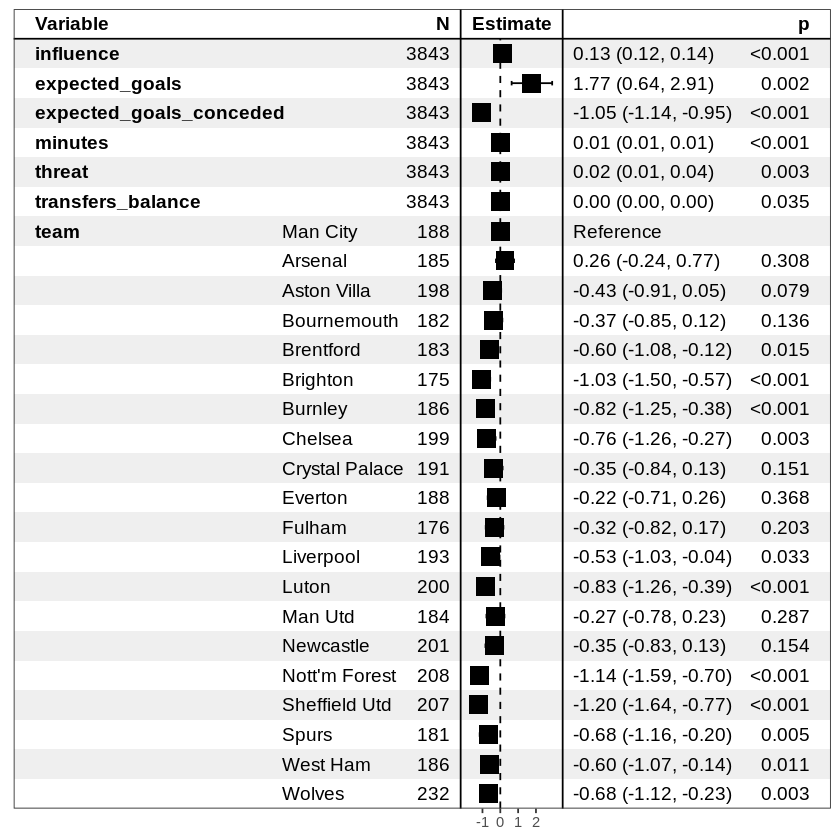

In [117]:
# install.packages("forestmodel")

library(forestmodel)

forest_model(robust_def, theme = theme_forest(), format_options = forest_model_format_options(text_size = 4))

Warning message in recalculate_width_panels(panel_positions, mapped_text = mapped_text, :
“Unable to resize forest panel to be smaller than its heading; consider a smaller text size”


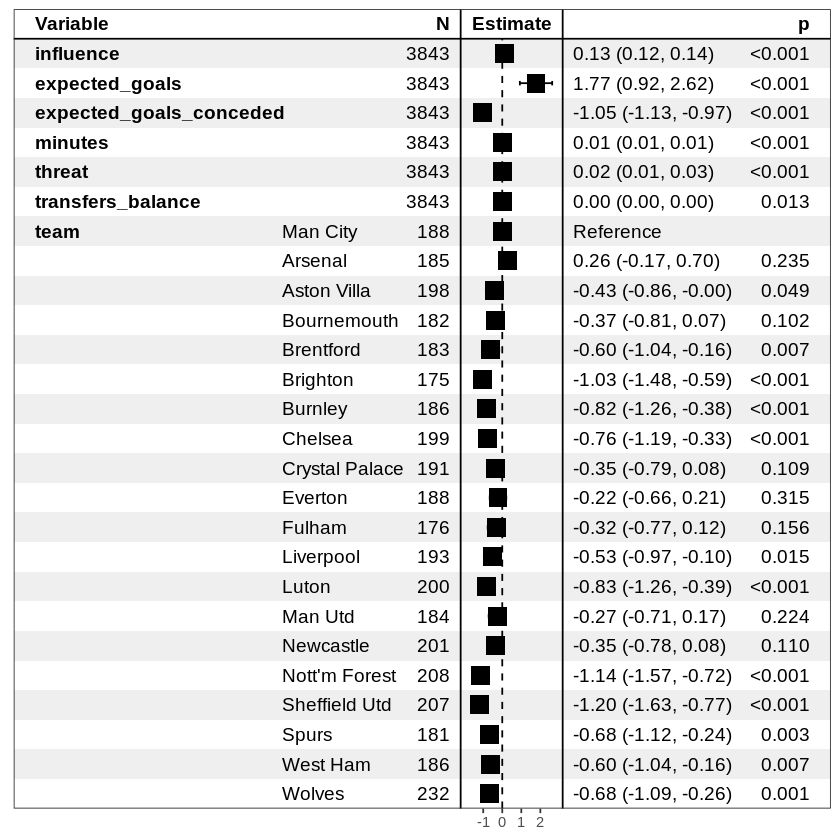

In [116]:
library(forestmodel)

forest_model(ols_defrr, theme = theme_forest(), format_options = forest_model_format_options(text_size = 4))

In [ ]:
# library(broom)
# library(dplyr)

# broom::glance(robust_def) %>%
#   select(where(is.numeric)) %>%
#   t() %>%
#   round(digits = 2)

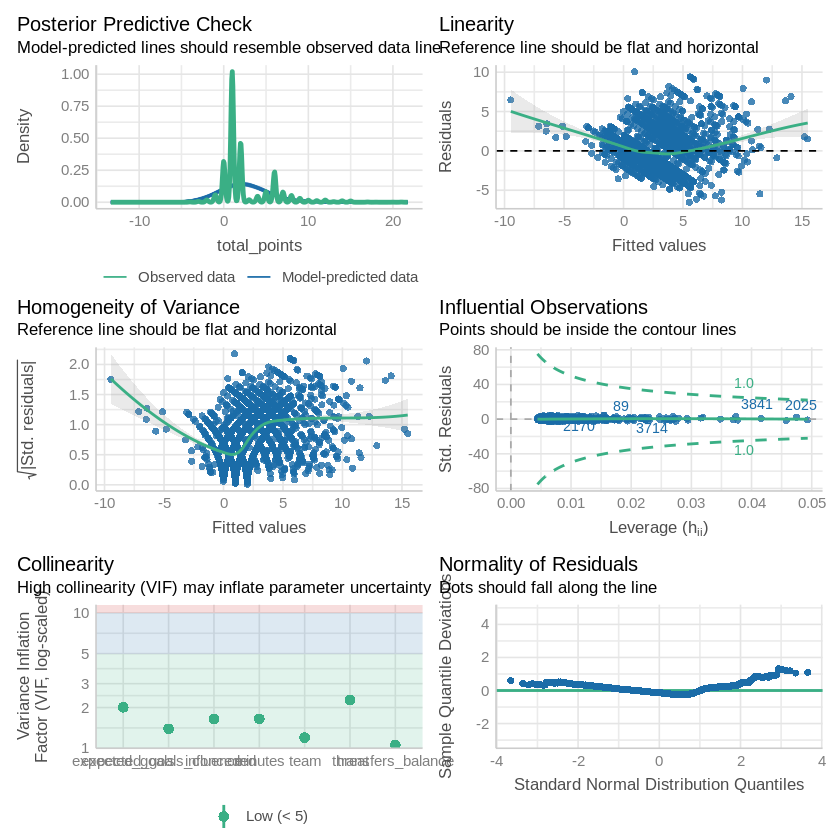

In [119]:
# install.packages("see")

library(performance)
library(see)

check_model(ols_defrr)

In [120]:
# install.packages("stargazer")
library(stargazer)

stargazer(ols_def, ols_defsw, ols_defdr, ols_defrr, type = "text", out = "ols_estimatr.txt")


                                                                       Dependent variable:                                            
                           -----------------------------------------------------------------------------------------------------------
                                                                          total_points                                                
                                      (1)                        (2)                        (3)                        (4)            
--------------------------------------------------------------------------------------------------------------------------------------
teamArsenal                          0.278                      0.275                      0.287                      0.264           
                                    (0.222)                    (0.222)                    (0.222)                    (0.222)          
                                                      

In [ ]:
# coef_lasso <- as.matrix(coef(lasso_model, s = best_lambda))  # replace with your lambda
# print(coef_lasso)

In [ ]:
# install.packages("modelsummary")
# library(modelsummary)

# # If you have estimates for LASSO (e.g., from coef(lasso_model, s = lambda)$s0)
# models <- list(
#   "OLS" = ols_def,
#   "Stepwise OLS" = ols_defsw,
#   "LASSO" = lasso_model  # This works better if extracted manually
# )

# modelsummary(models, output = "ols_comparison.txt")